# 1 Introduction

In linear regression, a **continuous output $y$ (or multiple outputs) is estimated based on a set of input variables $x_1, x_2, ..., x_n$ **. 

The output is written as a function of the input features. Then, the parameters of this function are fitted to the dataset.

One way in which the output can be written as a function of the input, is as follows. The features are $x_1, x_2, ..., x_n$.

$y = w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n$

The parameters $w_0, ... w_n$ can than be fitted to the dataset $y, w_0..w_n$. They will be chosen so that their predictions perform well on the training data. But this function assumes that the relationship between input and output is linear. The output is always a linear combination of the inputs. The learned relationship will be the best possible **linear** relationship.

In the real world, a lot of things are non-linear. If we want our model to be able to learn **non-linear relationships**, we must do **feature engineering**. 

For example, if we suspect that our output might actually depend quadratically on the second input variable $x_2$, we might rewrite our equation as below. Now, the features are $x_1, x_2^2, x_3, ... x_n$ an. We will **make a distinction between variables $x_1, x_2, .. x_n$ and the features that are derived from them**. One feature is one of the variables, or the square of a variable, or even the product of two variables, or any other function of one or more of the variables.

$y = w_0 + w_1x_1 + w_2x_2^2 + ... + w_nx_n$

We will use the notation of **'x' for input variables, and 'h' for features**. As such, we can rewrite our equation as follows:

$y = w_0 + w_1h_1 + w_2h_2 + ... + w_nh_n$

In the example above, $h_2 = x_2^2$

From the input variables, the input features are calculated. Then, the model is trained based on the features. The output is still a **linear function of the features**. Therefore, even though the relation of input **variables** to output could be non-linear, we still call this linear regression. 

In that case, the output will depend more strongly on $x_2$. If, on the other hand, we expect that our output $y$ is only very slightly influenced by $x_2$, we might use the square root of $x_2$ instead.

Feature engineering offers a lot of possibilities. We can always add more features. For example, we could use the following set of features: $x_1, x_2,x_2^2,x_3,x_3^2,x_3^4, x_4, \sqrt(x_4),..., x_5 * x_6,... x_n$.

When we do feature engineering and add more variations and new features to the model, the model will be able to learn more complex relationships between the input and the output. However, **beware of overfitting**. If the model is to complex, it could fit very well on the training set but perform badly on new data. Especially when less training data is available, choosing a more simple model could improve performance. The trained model is then likely to generalize better to new data. Simplifying the model can also be done by dropping some input variables.

Feature engineering must be done manually by the data scientists **before** creating the model. Experience and a good understanding of the data will certainly help!



# 2 House Sales dataset

This notebook will guide you through a first example of linear regression. The goal is to train a model that is able to predict the selling price of a house, based on some features. 

The dataset is taken from [Kaggle](https://www.kaggle.com/), an online platform and community where data scientists can share approaches, data sets and take part in machine learning competitions. 

Our House Sales dataset consists of 21613 observations of house prices in King County, USA. It includes home sold between May 2014 and May 2015. The input variables include the living area, number of bathrooms, number of bedrooms, wether or not there is a waterfront view, the condition and grade, building year, ...More info can be found [here](https://www.kaggle.com/harlfoxem/housesalesprediction). 

In what follows, we explore the data and we try to extract useful features from the input variables. Then we train a regression model with the third-party Python library **sklearn**. We will discuss important concepts like the **train-test split** and **over- and underfitting** and see these concepts in action. They are very important for the whole field of machine learning, not only for regression. 

# 3 Feature engineering

## 3.1 Reading and exploring the data

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#test change

In [0]:
dataset = pd.read_csv("notebook_3_files/kc_house_data.csv")

In [0]:
print("columns: ",dataset.columns)
print("")
print("number of columns: ",len(dataset.columns))
print("number of rows: ",len(dataset))

columns:  Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

number of columns:  21
number of rows:  21613


Our dataset consists of 19 columns for the input variables, one column with a house ID and one column with the price (i.e. the target output).

In [0]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
dataset.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## 3.2 One-hot encoding categorical features

The example data we printed above, did not include all columns due to space restrictions. Let's zoom in on some of the columns...

In [0]:
dataset[["waterfront","view","condition","grade","zipcode"]].head(10)

,waterfront,view,condition,grade,zipcode
0,0,0,3,7,98178
1,0,0,3,7,98125
2,0,0,3,6,98028
3,0,0,5,7,98136
4,0,0,3,8,98074
5,0,0,3,11,98053
6,0,0,3,7,98003
7,0,0,3,7,98198
8,0,0,3,7,98146
9,0,0,3,7,98038


First, we must check if any of the data is categorical. Most columns seem numerical, but others are categorical. 

For example, the **zip code**, even though it is a number, is a clear example of a categorical value. There is no real-world relationship between the price of a house and the magnitude of the zipcode. Having a zipcode of 99000 does not mean my house is more expensive than a house with zipcode 98000 or vice versa. 

There are 70 different zipcodes...

In [0]:
print("zipcodes: ",dataset["zipcode"].unique())
print("")
print("number of zipcodes: ",len(dataset["zipcode"].unique()))


zipcodes:  [98178 98125 98028 98136 98074 98053 98003 98198 98146 98038 98007 98115
 98107 98126 98019 98103 98002 98133 98040 98092 98030 98119 98112 98052
 98027 98117 98058 98001 98056 98166 98023 98070 98148 98105 98042 98008
 98059 98122 98144 98004 98005 98034 98075 98116 98010 98118 98199 98032
 98045 98102 98077 98108 98168 98177 98065 98029 98006 98109 98022 98033
 98155 98024 98011 98031 98106 98072 98188 98014 98055 98039]

number of zipcodes:  70


Still, we want to incorporate the zipcode into the model. The location of a house could have an influence on its price. We will **one-hot encode** the zipcode column. This means we add a column to the dataset for each of the 70 zipcodes. For each row, we put a 1 in the column that matches the houses zipcode, and a 0 in the others. Now, the zipcode column is split up into 70 numerical "feature columns".

In [0]:
def encode_categorical(dataframe, column):
    
    #return the same dataframe, but with the column one-hot encoded
    dummies = pd.get_dummies(dataframe[column])
    dummies.columns = [column+str(value) for value in dummies.columns]
    dataframe = dataframe.drop(columns = column)
    for new_column in dummies.columns:
        dataframe[new_column] = dummies[new_column]
    return dataframe
    

In [0]:
dataset = encode_categorical(dataset,'zipcode')

In [0]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode98146,zipcode98148,zipcode98155,zipcode98166,zipcode98168,zipcode98177,zipcode98178,zipcode98188,zipcode98198,zipcode98199
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0


Let's zoom into 4 additional variables: waterfront, view, condition, grade. 

For each of these variables, print all the unique values and the number of unique values.

In [0]:
print("unique values, and number of unique values")

print("waterfront:")
print(dataset["waterfront"].unique())
print(len(dataset["waterfront"].unique()))

print("view:")
print(dataset["view"].unique())
print(len(dataset["view"].unique()))

print("condition:")
print(dataset["condition"].unique())
print(len(dataset["condition"].unique()))

print("grade:")
print(dataset["grade"].unique())
print(len(dataset["grade"].unique()))

unique values, and number of unique values
waterfront:
[0 1]
2
view:
[0 3 4 2 1]
5
condition:
[3 5 4 1 2]
5
grade:
[ 7  6  8 11  9  5 10 12  4  3 13  1]
12


"waterfront" is a categorical feature, but since it is binary it is already "one-hot-encoded". The "view" property tells us how many times the house has been viewed by potential buyers. A high "view" value - a house that has been viewed a lot - might become more expensive, so this is indeed a numerical value. The "grade" and "condition" values give a score about the condition and grade (according to a King Country grading system) of the house. We will keep these values as numerical, assuming that a high score for either of these values corresponds to a relatively more expense house.

These are the feature columns we have up to now...

In [0]:
dataset.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat',
       'long', 'sqft_living15', 'sqft_lot15', 'zipcode98001', 'zipcode98002',
       'zipcode98003', 'zipcode98004', 'zipcode98005', 'zipcode98006',
       'zipcode98007', 'zipcode98008', 'zipcode98010', 'zipcode98011',
       'zipcode98014', 'zipcode98019', 'zipcode98022', 'zipcode98023',
       'zipcode98024', 'zipcode98027', 'zipcode98028', 'zipcode98029',
       'zipcode98030', 'zipcode98031', 'zipcode98032', 'zipcode98033',
       'zipcode98034', 'zipcode98038', 'zipcode98039', 'zipcode98040',
       'zipcode98042', 'zipcode98045', 'zipcode98052', 'zipcode98053',
       'zipcode98055', 'zipcode98056', 'zipcode98058', 'zipcode98059',
       'zipcode98065', 'zipcode98070', 'zipcode98072', 'zipcode98074',
       'zipcode98075', 'zipcode98077', 'zipcode98092', 'zipcode9810

## 3.3 Building age

The 'yr_built' column tells us the building year of the house. The column 'date' contains the date on which the house was sold. By combining these two columns for each data point, we can determine the age of the house at the time of selling. This could be valuable information: an older house is typically worth less than a recently built house.

In the cells below, add a column 'age' to the dataset.

In [0]:
dataset[["date","yr_built"]].head()

,date,yr_built
0,20141013T000000,1955
1,20141209T000000,1951
2,20150225T000000,1933
3,20141209T000000,1965
4,20150218T000000,1987


In [0]:
#step 1: extract the selling YEAR from the 'date' column and store in a new column 'year'.

dataset["selling_year"] = pd.DatetimeIndex(dataset["date"]).year
dataset["selling_year"].head()

0    2014
1    2014
2    2015
3    2014
4    2015
Name: selling_year, dtype: int64

In [0]:
#step 2: subtract yr_built from selling_yr to obtain the building age at selling time.

dataset["age"] = dataset["selling_year"] - dataset["yr_built"]
dataset["age"].head()

0    59
1    63
2    82
3    49
4    28
Name: age, dtype: int64

We also have the feature 'yr_renovated'. A house that was recently renovated, could be more expensive. Similarly to the building age, we could build a column 'years_since_renovation' that tells us how many years before selling there was a renovation. Let's first check out this column.

In [0]:
dataset["yr_renovated"].head(10)

0       0
1    1991
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
Name: yr_renovated, dtype: int64

If the house was never renovated, the year is set to zero. This is a problem, because this means we cannot simply subtract the selling year with the renovation year. Otherwise, a house that was renovated would have a meaningful value for 'years_since_renovation' and one that was never renovated would be "renovated" 2014 or 2015 years ago. Surely, our model would not improve if we added these non-sensical values to the dataset?

More-over, only a small percentage of our houses was renovated at least once. Just how many houses in our dataset were renovated?

In [0]:
# find the percentage of houses that were renovated

(dataset["yr_renovated"] != 0).sum()/len(dataset)

0.042289362883449776

Therefore, we will drop this column. 

**note: **If we wanted to, one way to include the renovation value was one-hot-encoding. We could add a column "renovated" that told us wether or not the building was renovated at least once. We would disregard the exact renovation year, but the feature could still be useful: 


Say $h_n$ is our onehot-encoded 'renovated' feature, we would expect to learn a positive weight $w_n$. Then, $w_nh_n$ could contribute positively to our output price $y$ if the house was once renovated ($h_n > 0$) and would not contribute at all to the price if it was never renovated ($h_n = 0$)


In [0]:
#drop the yr_renovated column. Also drop yr_built and selling_year, since they are no longer needed.

dataset = dataset.drop(columns="yr_renovated")
dataset = dataset.drop(columns="yr_built")
dataset = dataset.drop(columns="selling_year")

dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode98148,zipcode98155,zipcode98166,zipcode98168,zipcode98177,zipcode98178,zipcode98188,zipcode98198,zipcode98199,age
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,0,0,0,0,1,0,0,0,59
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,0,0,0,0,0,0,0,0,0,63
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,0,0,0,0,0,0,0,0,82
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,0,0,0,0,0,0,0,0,49
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,0,0,0,0,0,0,0,0,28


## 3.4 Dropping the date

One might argue that not only the age of time of selling, but also the exact selling date will influence the price. Market prices fluctuate and could be higher at certain times. We have sales data for the period of May 2014 to May 2015. Different scenarios are possible, due to market fluctuations.

1. Market prices are high in May 2014, and have steadily decreased to a lower point in May 2015.
2. Market prices are low in May 2014, and have steadily increased to a higher point in May 2015.
3. Market prices started rising in May 2014, reached a peak, and decreased back to the same level in May 2015.

Let's revisit our equation:

$y = w_0 + w_1h_1 + w_2h_2 + ... + w_nh_n$

We need to be able to find weights (positive or negative) that represent the impact of each feature $h$ on our output price $y$. If $h_1$ is our living area, for example, we expect our learned weight $w_1$ to be positive, so that a high living area results in a high selling price. On the contrary, the weight for the feature 'age' will be negative: an old building is less valuable.
In any case, **we must create features from our input variables that have a uniformly positive or negative influence on the output**. This is a limitation of linear regression. 



In [0]:
dataset["date"].head()

0    20141013T000000
1    20141209T000000
2    20150225T000000
3    20141209T000000
4    20150218T000000
Name: date, dtype: object

So what about our selling date? The timestamp string could be easily transformed into a numerical value. A higher value would mean a recent date, and a lower value would mean an earlier date. But due to market fluctuations, the selling price will not necessarily rise or decrease uniformly in time. This would be true in scenario 1 and 2 above, but not in scenario 3. Since there is no obvious way to transform the date alone into a useful feature, we decide to drop it.




In [0]:
#drop the date column

dataset = dataset.drop(columns="date")

**Note:** other algorithms, notably neural networks, are better in handling non-linear behaviour - even without the need for manual feature engineering. If market prices are higher in the middle of the observed period as in scenario 3, a neural network would be better at capturing this behaviour.

## 3.5 Dropping more columns

Apply a similar reasoning to the longitude and latitude information, as we did for the date column. Should we keep these columns?  

In [0]:
dataset[["lat","long"]].head()

,lat,long
0,47.5112,-122.257
1,47.7210,-122.319
2,47.7379,-122.233
3,47.5208,-122.393
4,47.6168,-122.045


We will drop these columns for a similar reason as the date. Moreover, the house location is already represented with the one-hot-encoded zipcode.

Also drop the useless 'id' column.

In [0]:
dataset["id"].head()

0    7129300520
1    6414100192
2    5631500400
3    2487200875
4    1954400510
Name: id, dtype: int64

In [0]:
#drop lat, long, id

dataset = dataset.drop(columns="lat")
dataset = dataset.drop(columns="long")
dataset = dataset.drop(columns="id")

Next, we inspect the following three features:

In [0]:
dataset[["sqft_living","sqft_basement","sqft_above"]].head()

,sqft_living,sqft_basement,sqft_above
0,1180,0,1180
1,2570,400,2170
2,770,0,770
3,1960,910,1050
4,1680,0,1680


We notice that sqft_living is always the sum of sqft_basement and sqft_above. We can even prove this is always the case:

In [0]:
dataset[dataset["sqft_living"] != dataset["sqft_basement"] + dataset["sqft_above"]]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode98148,zipcode98155,zipcode98166,zipcode98168,zipcode98177,zipcode98178,zipcode98188,zipcode98198,zipcode98199,age


Looking at our formula, having a feature that is the sum of two other features, would not make sense. If one feature is a linear combinations of others, then it will never add value to our model. 

$y = w_0 + w_1h_1 + w_2h_2 + w_3h_3 + ... + w_nh_n$

In our specific case, let's say $h_1 = h_2 + h_3$. Then we rewrite our equation as

$y = w_0 + w_1(h_2 + h_3) + w_2h_2 + w_3h_3 + ... + w_nh_n$
$  = w_0 + (w_1+w_2)h_2 + (w_1+W_3)h_3 + ... + w_nh_n$

Thus, an equivalent model without $h_1$ could be trained if we drop sqft_living.

In [0]:
dataset = dataset.drop(columns="sqft_living")

## 3.6 Resulting dataset

In [0]:
dataset.head()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,zipcode98148,zipcode98155,zipcode98166,zipcode98168,zipcode98177,zipcode98178,zipcode98188,zipcode98198,zipcode98199,age
0,221900.0,3,1.00,5650,1.0,0,0,3,7,1180,...,0,0,0,0,0,1,0,0,0,59
1,538000.0,3,2.25,7242,2.0,0,0,3,7,2170,...,0,0,0,0,0,0,0,0,0,63
2,180000.0,2,1.00,10000,1.0,0,0,3,6,770,...,0,0,0,0,0,0,0,0,0,82
3,604000.0,4,3.00,5000,1.0,0,0,5,7,1050,...,0,0,0,0,0,0,0,0,0,49
4,510000.0,3,2.00,8080,1.0,0,0,3,8,1680,...,0,0,0,0,0,0,0,0,0,28


In [0]:
dataset.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'sqft_living15', 'sqft_lot15', 'zipcode98001', 'zipcode98002',
       'zipcode98003', 'zipcode98004', 'zipcode98005', 'zipcode98006',
       'zipcode98007', 'zipcode98008', 'zipcode98010', 'zipcode98011',
       'zipcode98014', 'zipcode98019', 'zipcode98022', 'zipcode98023',
       'zipcode98024', 'zipcode98027', 'zipcode98028', 'zipcode98029',
       'zipcode98030', 'zipcode98031', 'zipcode98032', 'zipcode98033',
       'zipcode98034', 'zipcode98038', 'zipcode98039', 'zipcode98040',
       'zipcode98042', 'zipcode98045', 'zipcode98052', 'zipcode98053',
       'zipcode98055', 'zipcode98056', 'zipcode98058', 'zipcode98059',
       'zipcode98065', 'zipcode98070', 'zipcode98072', 'zipcode98074',
       'zipcode98075', 'zipcode98077', 'zipcode98092', 'zipcode98102',
       'zipcode98103', 'zipcode98105', 'zipcode98106', 'zipcode98107',
    

# 4 Training the model

## 4.1 Training our first model

Our data is now finally ready. Let's train the model using the third-party library **sklearn**. 

[documentation for the sklearn linear regressor](http://scikit-learn.org/dev/modules/generated/sklearn.linear_model.LinearRegression.html)

In [0]:
! pip install sklearn

In [0]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [0]:
#split the dataset in two pandas dataframe: one for all the features, another for just the price (our target)

dataset_target = dataset["price"]
dataset_features = dataset.drop(columns="price")


#The fitting method of our regressor will require a numpy array as input. Convert the data inside the pandas dataframe to a numpy array.

H = dataset_features.values
Y = dataset_target.values

#Check the dimensions of these arrays

print(H.shape)
print(Y.shape)

(21613, 83)
(21613,)


We split the data into a training set and a testing set. First we **train the model on the training data**, then we will **evaluate the performance of the model on the test set**. 

This way, we can determine wether or not the model is able to generalize to new, unseen data. A high performance on the training data does not mean you have a valuable model. Maybe the parameters were optimized to perform very well on the training data during training, but it does not perform well on new data. 

**note: ** We will later see that the train-test split (or even train-test-dev split) is also used for hyperparameter tuning. This is not relevant here since we have no hyperparameters to tune.

In [0]:
#Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(H,Y,test_size = 0.10, random_state=0)

#create model
regressionModel = LinearRegression()

#fit model
regressionModel.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

We **evaluate our model using the $R^2$ metric**. This metric has been discussed in the slides. 

Sklearn has built-in functionality to determine $R^2$ for a prediction. We will test our model on the test set.

In [0]:
regressionModel.score(X_test, Y_test)

0.814807920466211

## 4.2 Inspecting the model

The weights for our regression model ($y = w_0 + w_1h_1 + w_2h_2 + ... + w_nh_n$) are now trained. We can review them now:  
  [documentation for LinearRegression](http://scikit-learn.org/dev/modules/generated/sklearn.linear_model.LinearRegression.html)

In [0]:
regressionModel.coef_

array([-2.74607915e+04,  2.52255268e+04,  2.47276684e-01, -4.34001393e+04,
        6.79819724e+05,  5.47987598e+04,  2.33223793e+04,  5.69960913e+04,
        2.11545390e+02,  1.32082750e+02,  9.32942549e+00, -1.51862860e-01,
       -3.94903424e+11, -3.94903396e+11, -3.94903440e+11, -3.94902652e+11,
       -3.94903121e+11, -3.94903165e+11, -3.94903186e+11, -3.94903175e+11,
       -3.94903352e+11, -3.94903307e+11, -3.94903323e+11, -3.94903338e+11,
       -3.94903433e+11, -3.94903457e+11, -3.94903263e+11, -3.94903260e+11,
       -3.94903307e+11, -3.94903214e+11, -3.94903418e+11, -3.94903409e+11,
       -3.94903417e+11, -3.94903065e+11, -3.94903222e+11, -3.94903391e+11,
       -3.94902123e+11, -3.94902917e+11, -3.94903416e+11, -3.94903332e+11,
       -3.94903196e+11, -3.94903232e+11, -3.94903376e+11, -3.94903326e+11,
       -3.94903393e+11, -3.94903343e+11, -3.94903339e+11, -3.94903453e+11,
       -3.94903270e+11, -3.94903254e+11, -3.94903262e+11, -3.94903306e+11,
       -3.94903458e+11, -

Coefficients are returned as a numpy array. There are 84 in total, one for every feature (remember, the zipcode alone is split up into 70 one-hot-encoded features).

In [0]:
regressionModel.coef_.shape

(83,)

In [0]:
dataset_features.columns

Index(['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15',
       'sqft_lot15', 'zipcode98001', 'zipcode98002', 'zipcode98003',
       'zipcode98004', 'zipcode98005', 'zipcode98006', 'zipcode98007',
       'zipcode98008', 'zipcode98010', 'zipcode98011', 'zipcode98014',
       'zipcode98019', 'zipcode98022', 'zipcode98023', 'zipcode98024',
       'zipcode98027', 'zipcode98028', 'zipcode98029', 'zipcode98030',
       'zipcode98031', 'zipcode98032', 'zipcode98033', 'zipcode98034',
       'zipcode98038', 'zipcode98039', 'zipcode98040', 'zipcode98042',
       'zipcode98045', 'zipcode98052', 'zipcode98053', 'zipcode98055',
       'zipcode98056', 'zipcode98058', 'zipcode98059', 'zipcode98065',
       'zipcode98070', 'zipcode98072', 'zipcode98074', 'zipcode98075',
       'zipcode98077', 'zipcode98092', 'zipcode98102', 'zipcode98103',
       'zipcode98105', 'zipcode98106', 'zipcode98107', 'zipcode98108

Let's put our features and their coefficients together in a pandas dataframe, so we can easily inspect them:

In [0]:
regressionModel_coefficients = pd.DataFrame({'feature':dataset_features.columns,'coefficient':regressionModel.coef_})

In [0]:
regressionModel_coefficients.head(15)

,coefficient,feature
0,-2.746079e+04,bedrooms
1,2.522553e+04,bathrooms
2,2.472767e-01,sqft_lot
3,-4.340014e+04,floors
4,6.798197e+05,waterfront
5,5.479876e+04,view
6,2.332238e+04,condition
7,5.699609e+04,grade
8,2.115454e+02,sqft_above
9,1.320827e+02,sqft_basement


To better inspect our weights, we take out all zipcode features and sort the features according to weight size. 

In [0]:
mask = np.core.defchararray.find(regressionModel_coefficients["feature"].values.astype(str),"zipcode")
regressionModel_coefficients[mask == -1].sort_values(by="coefficient")

,coefficient,feature
3,-43400.139345,floors
0,-27460.791548,bedrooms
11,-0.151863,sqft_lot15
2,0.247277,sqft_lot
10,9.329425,sqft_living15
9,132.082750,sqft_basement
8,211.545390,sqft_above
82,858.708618,age
6,23322.379273,condition
1,25225.526817,bathrooms


The features with positive coefficient indicate a positive impact on the price. Negative coefficients point to a negative impact. 

If one feature has a larger coefficient than another, this does not necessarily mean that its impact is higher. For example, the floors column has a coefficient with a large absolute value, but this coefficient is multiplied by floor values ranging only from 1 to 3.5. On the other hand, sqft_above has a smaller coefficient, but the sqft_above variable typically has larger values.

$y = w_0 + w_1h_1 + w_2h_2 + w_3h_3 + ... + w_nh_n$


In [0]:
print("floors, min",dataset_features["floors"].min())
print("floors, max",dataset_features["floors"].max())

print("sqft_above, min",dataset_features["sqft_above"].min())
print("sqft_above, max",dataset_features["sqft_above"].max())

floors, min 1.0
floors, max 3.5
sqft_above, min 290
sqft_above, max 9410


The trained model has learned that a higher age has a positive impact on the price, since it has a positive coefficient. Similarly, the number of floors has a negative impact. This is **counter-intuitive** at first sight. 

**But our features are related**. A house with many floors is typically large with more square feet. And the living area has a positive coefficient. The absolute value of the coefficients related to area is smaller than the floors coefficient, but they are multiplied with a larger value (square feet area instead of number of floors), so they might compensate.

A similar but inverse argument could be made for the age: an older building could have a lower score for 'grade' and 'condition'.

# 5 Extra feature engineering and training

Until now, our feature engineering was relatively basic. We one-hot-encoded the zipcode, dropped some columns and added the age column. Eventually, we trained on these features.

In [0]:
dataset_features.head()

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,...,zipcode98148,zipcode98155,zipcode98166,zipcode98168,zipcode98177,zipcode98178,zipcode98188,zipcode98198,zipcode98199,age
0,3,1.00,5650,1.0,0,0,3,7,1180,0,...,0,0,0,0,0,1,0,0,0,59
1,3,2.25,7242,2.0,0,0,3,7,2170,400,...,0,0,0,0,0,0,0,0,0,63
2,2,1.00,10000,1.0,0,0,3,6,770,0,...,0,0,0,0,0,0,0,0,0,82
3,4,3.00,5000,1.0,0,0,5,7,1050,910,...,0,0,0,0,0,0,0,0,0,49
4,3,2.00,8080,1.0,0,0,3,8,1680,0,...,0,0,0,0,0,0,0,0,0,28


In [0]:
dataset_features.columns

Index(['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15',
       'sqft_lot15', 'zipcode98001', 'zipcode98002', 'zipcode98003',
       'zipcode98004', 'zipcode98005', 'zipcode98006', 'zipcode98007',
       'zipcode98008', 'zipcode98010', 'zipcode98011', 'zipcode98014',
       'zipcode98019', 'zipcode98022', 'zipcode98023', 'zipcode98024',
       'zipcode98027', 'zipcode98028', 'zipcode98029', 'zipcode98030',
       'zipcode98031', 'zipcode98032', 'zipcode98033', 'zipcode98034',
       'zipcode98038', 'zipcode98039', 'zipcode98040', 'zipcode98042',
       'zipcode98045', 'zipcode98052', 'zipcode98053', 'zipcode98055',
       'zipcode98056', 'zipcode98058', 'zipcode98059', 'zipcode98065',
       'zipcode98070', 'zipcode98072', 'zipcode98074', 'zipcode98075',
       'zipcode98077', 'zipcode98092', 'zipcode98102', 'zipcode98103',
       'zipcode98105', 'zipcode98106', 'zipcode98107', 'zipcode98108

We suspect that the sales price does not depend linearly on the area.

Starting from a small house, we can quickly increase the house's value by increasing the area. When a small house is doubled in size, the value could also grow proportionally according to some coefficient. But when your house is already very big, adding the same amount of square meters will only slightly improve the value of your house.

We will model this principle by assuming the sales price varies linearly with the **square root** of the area. The curve of a square root is displayed below. It is a monotonically rising curve. For small values, the square root rises quickly. When the value grows, the square grows more slowly.

Moreover, we will add a feature "number of bathrooms per bedroom".


Text(0,0.5,'square root')

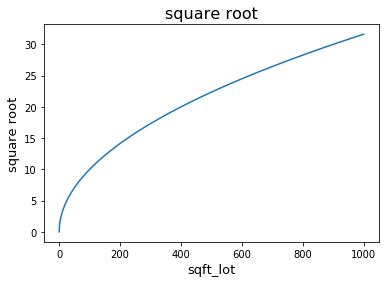

In [0]:
x = np.arange(0,1000,1)
y = np.sqrt(x)
plt.subplot(1,1,1)
plt.plot(x,y)
plt.title("square root",fontsize=16)
plt.xlabel("sqft_lot",fontsize=13)
plt.ylabel("square root",fontsize=13)

**do some extra feature engineering: **
1. drop the 'floors' column
2. for sqft_lot column, create a new column root_sqft_lot with the square root of the original column. Then, drop the original column sqft_lot and retrain the model.
3. Add a column "bath_per_bed", the number of bathrooms per bedroom, and remove the bathrooms column


Store the new set of features in a new dataframe, *dataset_features_engineered*. Retrain the model with these features
        
        

In [0]:
#make a copy of the current feature set
dataset_engineered = dataset.copy()

# drop the floors column
dataset_engineered = dataset_engineered.drop(columns = "floors")

#add root_sqft_lot, remove sqft_lot
dataset_engineered["root_sqft_lot"] = np.sqrt(dataset["sqft_lot"])
dataset_engineered = dataset_engineered.drop(columns="sqft_lot")  

#add bath_per_bed, remove bathrooms. First remove all rows where bedrooms = 0, to avoid dividing by zero 
#(If you want, check that this deletes only a very small number of rows.) 
dataset_engineered = dataset_engineered[dataset_engineered["bedrooms"] != 0]
dataset_engineered["bath_per_bed"] = dataset_engineered["bathrooms"] / dataset_engineered["bedrooms"]
dataset_engineered = dataset_engineered.drop(columns="bathrooms")

In [0]:
dataset_engineered.head()

,price,bedrooms,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,...,zipcode98166,zipcode98168,zipcode98177,zipcode98178,zipcode98188,zipcode98198,zipcode98199,age,root_sqft_lot,bath_per_bed
0,221900.0,3,0,0,3,7,1180,0,1340,5650,...,0,0,0,1,0,0,0,59,75.166482,0.333333
1,538000.0,3,0,0,3,7,2170,400,1690,7639,...,0,0,0,0,0,0,0,63,85.099941,0.750000
2,180000.0,2,0,0,3,6,770,0,2720,8062,...,0,0,0,0,0,0,0,82,100.000000,0.500000
3,604000.0,4,0,0,5,7,1050,910,1360,5000,...,0,0,0,0,0,0,0,49,70.710678,0.750000
4,510000.0,3,0,0,3,8,1680,0,1800,7503,...,0,0,0,0,0,0,0,28,89.888820,0.666667


In [0]:
#RETRAIN

dataset_target_engineered = dataset_engineered["price"]
dataset_features_engineered = dataset_engineered.drop(columns="price")

#get numpy values
H = dataset_features_engineered.values
Y = dataset_target_engineered.values

#Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(H,Y,test_size = 0.10,random_state=0)

#create model
regressionModel = LinearRegression(normalize=True)

#fit model
regressionModel.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [0]:
R2 = regressionModel.score(X_test, Y_test)
print(R2)

0.8176778609991254


Our **score** is only **slightly higher** than our previous model.

In [0]:
regressionModel_coefficients_engineered = pd.DataFrame({'feature':dataset_features_engineered.columns,'coefficient':regressionModel.coef_})

In [0]:
mask = np.core.defchararray.find(regressionModel_coefficients_engineered["feature"].values.astype(str),"zipcode")
regressionModel_coefficients_engineered[mask == -1].sort_values(by="coefficient")

,coefficient,feature
0,-25144.968054,bedrooms
8,-0.287364,sqft_lot15
7,8.023719,sqft_living15
6,157.211216,sqft_basement
5,208.845128,sqft_above
80,245.200780,root_sqft_lot
79,912.436097,age
81,1434.720001,bath_per_bed
3,23881.888815,condition
2,55663.190273,view


# 6 Regularization

In this section, we use ridge regression as a regularization method. In this method, high weights are penalized by the loss function in order to avoid overfitting on the training data. We will use sklearn's built-in ridge regression functionality.

Find the [documentatation](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) here. Briefly read the documentation. What extra parameter does the function need?

Perform the steps lined out in the comments.

In [0]:
X_train.shape

(19440, 82)

In [0]:
#import the ridge regression functionality (use the format "from ... import ...")
from sklearn.linear_model import Ridge

In [0]:
print(R2)

0.8176778609991254


In [0]:
#initialize a ridge regression model. Use the default for the hyperparameter. Input data should be normalized.
regressionModelRidge = Ridge()

#fit the model on the train set
regressionModelRidge.fit(X_train,Y_train)

#evaluate the model on the test set
ridgeR2 = regressionModelRidge.score(X_test, Y_test)
print(ridgeR2)

0.8175299328466863


Ridge regression has not really improved our model. In the cells above, we used sklearns default value for the hyperparameter, lambda = 1. Maybe we need a different choice of lambda?

# 7 Cross-validation

Use 10-cross-validation to find an optimal regression model. Perform the following steps: 

In [0]:
#leave this cell commented for now...
# H = H[0:1000]
# Y = Y[0:1000]

In [0]:
#split the dataset in a train/dev set and a test/set
X_traindev, X_test, Y_traindev, Y_test = train_test_split(H,Y,test_size = 0.10,random_state=0)

m = X_traindev.shape[0]
print("number of samples in train/dev set: m =",m)


number of samples in train/dev set: m = 900


In [0]:
#split the train/dev set into 10 "folds". Store all folds in a list of numpy arrays
k = 10
samples_per_fold = int(m/k)
X_folds = [X_traindev[k*samples_per_fold:(k+1)*samples_per_fold,:] for k in range(10)]
Y_folds = [Y_traindev[k*samples_per_fold:(k+1)*samples_per_fold] for k in range(10)]

print("number of folds: ",len(X_folds))
print("size of one fold:",X_folds[0].shape)

number of folds:  10
size of one fold: (90, 82)


In [0]:
models = []
average_dev_scores = []
average_train_scores = []
hyperparameters = np.logspace(-2,1,10)
for l in hyperparameters: #for all hyperparameters
    dev_scores = []
    train_scores = []
    for i in range(k):
        X_folds_copy = X_folds.copy()
        Y_folds_copy = Y_folds.copy()
        
        X_dev = X_folds_copy.pop(i)
        X_train = np.concatenate(X_folds_copy)
        
        Y_dev = Y_folds_copy.pop(i)
        Y_train = np.concatenate(Y_folds_copy)
        
        regressionModelRidge = Ridge(alpha=l)
              
        regressionModelRidge.fit(X_train, Y_train)
        
        R2_dev = regressionModelRidge.score(X_dev, Y_dev)
        dev_scores.append(R2_dev)
        
        R2_train = regressionModelRidge.score(X_train, Y_train)
        train_scores.append(R2_train)
        
        
    average_dev_score = sum(dev_scores)/float(len(dev_scores))
    average_dev_scores.append(average_dev_score)
    
    average_train_score = sum(train_scores)/float(len(train_scores))
    average_train_scores.append(average_train_score)
        
    models.append(regressionModelRidge)
    print("l = {0}, avg dev score={1}, avg train score={2}".format(l, average_dev_score, average_train_score))       

l = 0.01, avg dev score=0.7699821821694876, avg train score=0.8541752989189891
l = 0.021544346900318832, avg dev score=0.7703476455102238, avg train score=0.8541712952604211
l = 0.046415888336127774, avg dev score=0.7711054589474109, avg train score=0.8541531797462956
l = 0.1, avg dev score=0.7726098753374581, avg train score=0.8540734574515664
l = 0.21544346900318834, avg dev score=0.7753331535989079, avg train score=0.8537412925477815
l = 0.46415888336127775, avg dev score=0.7793778906174171, avg train score=0.8524883574254734
l = 1.0, avg dev score=0.7830484551929457, avg train score=0.848461062603298
l = 2.154434690031882, avg dev score=0.781362149415901, avg train score=0.838062075605961
l = 4.6415888336127775, avg dev score=0.7676971938463372, avg train score=0.817212454597249
l = 10.0, avg dev score=0.7395827409461873, avg train score=0.7850593339626861


In [0]:
#pick the model with highest score
index_best = np.argmax(average_dev_scores)
model_best = models[index_best]

#evluate the chosen model on the test set
model_best.score(X_test, Y_test)

0.5125914338746531

Even after hyperparameter tuning, the model has not improved. A remarking result is that the score on the test set is higher than the average score on the dev set. We will attribute this to randomness.

Our current dataset has 21613 samples in total. In order to better illustrate the benefit on cross-validation, we will use a smaller sample dataset. Uncomment the first cell of section 7 and run the cells of this section again. The dataset is now artificially reduced to the first 1000 samples. 

Note that with the smaller dataset, cross validation does have an impact. The score on the test set is suprisingly low.

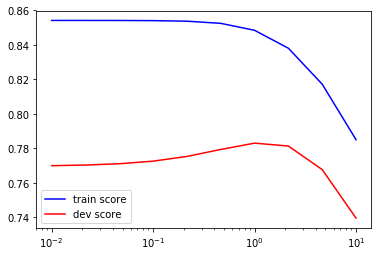

In [0]:
from matplotlib import pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xscale('log')

plt.plot(hyperparameters,average_train_scores,"b",hyperparameters,average_dev_scores,"r")
plt.legend(["train score","dev score"])


Does the plot make sense to you?

# 7 Conclusion and take-aways

Linear regression requires manual feature engineering. For this, you need experience, insight in your data, and a lot of experimentation. 

With some extra and more advanced feature engineering, you might be able to improve the model. Or you could try a different algorithm? [Visit the page on Kaggle](https://www.kaggle.com/harlfoxem/housesalesprediction/home) where people share their code (*kernels*) and discuss their own solution with each other.

